# Combined Data!

In [2]:
# 3rd Party Imports
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Crime Data
crime = pd.read_csv("crime_data/crime.csv")
crime = gpd.GeoDataFrame(crime, geometry=gpd.GeoSeries.from_wkt(crime['geometry']), crs="EPSG:4326")
crime.head()

,NEIGHBOURHOOD,POPULATION,geometry,ASSAULT,ASSAULT_NORM,AUTOTHEFT,AUTOTHEFT_NORM,BIKETHEFT,BIKETHEFT_NORM,BREAKENTER,...,HOMICIDE,HOMICIDE_NORM,ROBBERY,ROBBERY_NORM,SHOOTING,SHOOTING_NORM,THEFT_MV,THEFT_MV_NORM,THEFT_OV,THEFT_OV_NORM
0,South Eglinton-Davisville,21987,"POLYGON ((-79.38635 43.69784, -79.38623 43.697...",257.806720,0.011725,30.665895,0.001395,104.975584,0.004774,130.266611,...,1.197520,0.000054,32.034761,0.001457,1.820015,0.000083,76.243084,0.003468,11.917225,0.000542
1,North Toronto,15077,"POLYGON ((-79.39744 43.70694, -79.39837 43.706...",312.227180,0.020709,28.839955,0.001913,77.893082,0.005166,171.983067,...,0.843186,0.000056,40.480436,0.002685,0.799834,0.000053,75.922334,0.005036,15.778356,0.001047
2,Dovercourt Village,13837,"POLYGON ((-79.43412 43.66015, -79.43537 43.659...",353.172389,0.025524,61.799989,0.004466,135.222384,0.009773,171.290513,...,2.072072,0.000150,86.070851,0.006220,2.082016,0.000150,187.256442,0.013533,14.555833,0.001052
3,Junction-Wallace Emerson,26240,"POLYGON ((-79.4387 43.66767, -79.43841 43.6669...",422.010159,0.016083,68.775774,0.002621,127.214314,0.004848,172.364532,...,1.542461,0.000059,57.355054,0.002186,6.464922,0.000246,200.356534,0.007636,16.701560,0.000636
4,Yonge-Bay Corridor,14731,"POLYGON ((-79.38404 43.64497, -79.38502 43.644...",2218.028369,0.150569,103.680670,0.007038,930.550018,0.063170,479.260519,...,4.064631,0.000276,298.961034,0.020295,8.989731,0.000610,475.313570,0.032266,176.995572,0.012015


In [4]:
# Import Parks Data
parks = pd.read_csv("parks_data/combined_areas.csv")
parks = gpd.GeoDataFrame(parks, geometry=gpd.GeoSeries.from_wkt(parks['geometry']), crs="EPSG:32633")
parks.head()

,ASSET_NAME,geometry,TYPE,AREA
0,120 QUEENS QUAY E PARK,"POLYGON ((-5312216.594 10505968.312, -5312122....",Park,0.002330
1,167 ARMOUR BLVD PARKETTE,"POLYGON ((-5295684.01 10511379.406, -5295685.3...",Park,0.001800
2,174 SOUDAN AVE PARK,"POLYGON ((-5302106.639 10507533.959, -5302103....",Park,0.000464
3,175 THE POND RD PARK,"POLYGON ((-5290633.045 10519542.664, -5290648....",Park,0.025816
4,20 CASTLEFIELD AVE PARK,"POLYGON ((-5301047.005 10508386.441, -5301066....",Park,0.007734


In [5]:
# Import Subway Data
subway = pd.read_csv("Subway_data/ttc.csv")
subway = gpd.GeoDataFrame(subway, geometry=gpd.GeoSeries.from_wkt(subway['geometry']), crs="EPSG:4326")
subway.head()

,ROUTE_NAME,RID,geometry
0,LINE 1 (YONGE-UNIVERSITY),1,"LINESTRING (-79.52813 43.79677, -79.52689 43.7..."
1,LINE 2 (BLOOR - DANFORTH),2,"LINESTRING (-79.5354 43.63781, -79.53386 43.63..."
2,LINE 3 (SCARBOROUGH),3,"LINESTRING (-79.26332 43.73266, -79.26332 43.7..."
3,LINE 4 (SHEPPARD),4,"LINESTRING (-79.41113 43.76145, -79.40981 43.7..."


In [6]:
# Import Census Data (NOTE: NOT COMPLETE)
census = pd.read_csv("census_data/census.csv")
census = gpd.GeoDataFrame(census, geometry=gpd.GeoSeries.from_wkt(census['geometry']), crs="EPSG:4326")
census.head()

,AREA_NA7,geometry,Neighbourhood Number,TSNS 2020 Designation,Total - Age groups of the population - 25% sample data,0 to 14 years,0 to 4 years,5 to 9 years,10 to 14 years,15 to 64 years,...,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,Total - Eligibility for instruction in the minority official language for the population in private households born in 2003 or later - 25% sample data,Children eligible for instruction in the minority official language,Children not eligible for instruction in the minority official language,"Total - Eligibility and instruction in the minority official language, for the population in private households born between 2003 and 2015 (inclusive) - 25% sample data",Children eligible for instruction in the minority official language.1,Eligible children who have been instructed in the minority official language at the primary or secondary level in Canada,Eligible children who have not been instructed in the minority official language at the primary or secondary level in Canada,Children not eligible for instruction in the minority official language.1
0,South Eglinton-Davisville,"POLYGON ((-79.38635 43.69783, -79.38623 43.697...",174,Not an NIA or Emerging Neighbourhood,22735,2190,910,670,610,17495,...,1390,730,2570,265,2300,1580,155,105,45,1420
1,North Toronto,"POLYGON ((-79.39744 43.70693, -79.39837 43.706...",173,Not an NIA or Emerging Neighbourhood,15885,1315,535,390,390,12780,...,970,550,1620,145,1470,1050,95,65,30,955
2,Dovercourt Village,"POLYGON ((-79.43411 43.66015, -79.43537 43.659...",172,Not an NIA or Emerging Neighbourhood,12380,1365,445,430,490,9040,...,775,570,1665,175,1490,1190,130,95,35,1060
3,Junction-Wallace Emerson,"POLYGON ((-79.4387 43.66766, -79.43841 43.6669...",171,Not an NIA or Emerging Neighbourhood,23180,3075,1135,1020,925,17200,...,1185,1105,3580,410,3170,2375,305,190,115,2075
4,Yonge-Bay Corridor,"POLYGON ((-79.38404 43.64497, -79.38502 43.644...",170,Not an NIA or Emerging Neighbourhood,12645,970,500,270,200,10820,...,695,330,1075,50,1020,555,30,10,20,520


In [7]:
# Import School Data
schools = pd.read_csv("school_data/combined_schools_with_cords.csv")
geometry = [Point(xy) for xy in zip(schools['longitude'], schools['latitude'])]
schools = gpd.GeoDataFrame(schools, geometry=geometry, crs="EPSG:4326")
schools.head()

,Unnamed: 0,School Name_x,EQAO_Total # of\r\nStudents,EQAO_# of\r\nParticipating\r\nStudents,EQAO_# of\r\nStudents at\r\nLevels 3/4,EQAO_% at Levels\r\n3/4,OSSLT_Number of\r\nPreviously\r\nEligible\r\nStudents,OSSLT_Absent\r\n(All\r\nPreviously\r\nEligible\r\nStudents),OSSLT_Deferred\r\n(All\r\nPreviously\r\nEligible\r\nStudents),OSSLT_Successful\r\n(Fully\r\nParticipating),OSSLT_Not\r\nSuccessful\r\n(Fully\r\nParticipating),Partial Name_x,School Name_y,Score,Rank,latitude,longitude,geometry
0,0,A Y Jackson Secondary School,112,103,96,93%,312,8%,0%,88%,12%,a y jackson,a y jackson,7.9,77/689,43.804716,-79.367003,POINT (-79.367 43.80472)
1,1,Agincourt Collegiate Institute,184,172,125,73%,388,1%,<1%,94%,6%,agincourt,agincourt,8.3,41/689,43.789069,-79.278470,POINT (-79.27847 43.78907)
2,2,Albert Campbell Collegiate Institute,169,158,100,63%,261,4%,7%,88%,12%,albert campbell,albert campbell,7.0,210/689,43.810001,-79.273357,POINT (-79.27336 43.81)
3,3,Birchmount Park Collegiate Institute,104,87,28,32%,169,22%,1%,79%,21%,birchmount park,birchmount park,5.2,496/689,43.697853,-79.259599,POINT (-79.2596 43.69785)
4,4,Bloor Collegiate Institute,78,75,59,79%,197,4%,0%,94%,6%,bloor,bloor,8.5,26/689,NaN,NaN,POINT EMPTY


In [ ]:
"""# Import Real Estate Data and Clean (NOTE: Need to Filter for Toronto, ON)

# real_estate1 is house sigma
real_estate1 = pd.read_csv("house_data/housesigma_data_with_coords.csv")
real_estate1 = real_estate1.drop(columns=["Unnamed: 0", "Lat", "Long", "Column_7"], inplace=False)
real_estate1 = real_estate1.rename(columns={'Column_8': 'latitude', 'Column_9': 'longitude'})
geometry = [Point(xy) for xy in zip(real_estate1['longitude'], real_estate1['latitude'])]
real_estate1 = gpd.GeoDataFrame(real_estate1, geometry=geometry, crs="EPSG:4326")
real_estate1.head()"""

,link,Listed Price,Sold Price,Type,address,latitude,longitude,geometry
0,/on/richmond-hill-real-estate/204-330-red-mapl...,"$600,000","$605,000",Condo Apt,"204 - 330 Red Maple Rd , Richmond Hill - Langs...",43.850877,-79.428248,POINT (-79.42825 43.85088)
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,"$729,888","$680,000",Condo Apt,"508 - 40 Richview Rd , Etobicoke - Humber Heights",43.685146,-79.515954,POINT (-79.51595 43.68515)
2,/on/mississauga-real-estate/1616-50-mississaug...,"$619,900","$595,000",Condo Apt,"1616 - 50 Mississauga Valley Blvd , Mississaug...",43.589720,-79.625824,POINT (-79.62582 43.58972)
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,"$874,999","$815,000",Detached,"24 Wallis Cres , Etobicoke - Mount Olive-Silve...",43.754292,-79.592347,POINT (-79.59235 43.75429)
4,/on/vaughan-real-estate/27-novella-rd/home/b1D...,"$1,198,000","$1,148,000",Semi-Detached,"27 Novella Rd , Vaughan - Patterson",43.840408,-79.487654,POINT (-79.48765 43.84041)


In [ ]:
"""# Import Real Estate Data and Clean (NOTE: Need to Filter for Toronto, ON)

# real_estate2 is realtor
real_estate2 = pd.read_csv("house_data/realtor_with_coords.csv")
geometry = [Point(xy) for xy in zip(real_estate2['long'], real_estate2['lat'])]
real_estate2 = gpd.GeoDataFrame(real_estate2, geometry=geometry, crs="EPSG:4326")
real_estate2.head()"""

,Unnamed: 0,price,address,mls,office_name,office_type,office_address,Property Type,Building Type,Storeys,...,Other Style,Fireplace Fuel,Utility-Hydro,Other,Age Of Building,Business Type,street address,lat,long,geometry
0,0,"$899,800",50 - 719 LAWRENCE AVENUE WToronto (Yorkdale-Gl...,W10678586,RE/MAX ATRIUM HOME REALTY,Brokerage,"7100 WARDEN AVE #1AMARKHAM, Ontario L3R8B5",Single Family,Row / Townhouse,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,719 lawrence avenue w,43.714933,-79.448608,POINT (-79.44861 43.71493)
1,1,"$888,000",1515 - 8 HILLCREST AVENUEToronto (Willowdale E...,C10650046,HOMELIFE NEW WORLD REALTY INC.,Brokerage,"201 CONSUMERS RD., STE. 205TORONTO, Ontario M2...",Single Family,Apartment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8 hillcrest avenue,43.767937,-79.412160,POINT (-79.41216 43.76794)
2,2,"$639,000",1502 - 10 YORK STREETToronto (Waterfront Commu...,C10640404,RE/MAX REALTRON TNS REALTY INC.,Brokerage,"7800 WOODBINE AVE PHMARKHAM, Ontario L3R2N7",Single Family,Apartment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10 york street,43.641145,-79.381312,POINT (-79.38131 43.64115)
3,3,"$1,139,000",185 RICHARD CLARK DRIVEToronto (Downsview-Rodi...,W10562062,IPRO REALTY LTD.,Brokerage,"3079B DUNDAS ST WESTTORONTO, Ontario M6P1Z9",Single Family,House,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,185 richard clark drive,43.726186,-79.498531,POINT (-79.49853 43.72619)
4,4,"$2,150,000","112 ANNDALE DRIVEToronto (Willowdale East), On...",C10564186,HOMELIFE GOLD PACIFIC REALTY INC.,Brokerage,"3601 VICTORIA PARK AVE #401TORONTO, Ontario M1...",Single Family,House,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,112 anndale drive,43.762464,-79.399510,POINT (-79.39951 43.76246)


In [ ]:
"""# Import Real Estate Data and Clean (NOTE: Need to Filter for Toronto, ON)

# real_estate3 is zolo
real_estate3 = pd.read_csv("house_data/zolo_with_coords.csv")
geometry = [Point(xy) for xy in zip(real_estate3['long'], real_estate3['lat'])]
real_estate3 = gpd.GeoDataFrame(real_estate3, geometry=geometry, crs="EPSG:4326")
real_estate3.head()"""

,Unnamed: 0,price,address,rooms,room dimensions,room_properties,Status,Type,Style,Size (sq ft),...,Com_cn_fee,Ceil Height (ft),Ceiling Height,Crane,Industrial Area,Industrial Area Units,Central Vac,lat,long,geometry
0,0,649900,15 Lower Jarvis Street,"['4pc Bathroom', 'Primary Bedroom', 'Den', 'Fo...","['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']","['Measurements not available', ""7'10'' x 13'5'...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.645237,-79.369244,POINT (-79.36924 43.64524)
1,1,349900,212 - 234 Albion Road,"['Living', 'Dining', 'Kitchen', 'Prim Bdrm', '...","['4.10 x 6.55', '4.10 x 6.55', '2.48 x 5.21', ...","['Combined W/Dining, Broadloom, W/O To Balcony...",Sale,Condo Apt,Apartment,1000-1199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.721180,-79.544316,POINT (-79.54432 43.72118)
2,2,575000,1408 - 23 Sheppard Avenue E,"['Living', 'Dining', 'Kitchen', 'Prim Bdrm', '...","['3.20 x 4.60', '3.20 x 4.60', '2.50 x 3.35', ...","['Combined W/Dining, Laminate, W/O To Balcony'...",Sale,Condo Apt,Apartment,500-599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.761240,-79.409004,POINT (-79.409 43.76124)
3,3,429000,1109 - 82 Dalhousie Street,"['Living', 'Dining', 'Kitchen']","['3.20 x 4.65', '3.20 x 4.65', '3.20 x 4.65']","['Combined W/Kitchen, Open Concept', 'Laminate...",Sale,Condo Apt,Apartment,0-499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.655802,-79.376441,POINT (-79.37644 43.6558)
4,4,399900,1104 - 581 Avenue Road,"['Living', 'Dining', 'Kitchen', 'Br']","['5.82 x 3.15', '3.84 x 2.39', '3.02 x 2.31', ...","['W/O To Balcony, Parquet Floor, Large Window'...",Sale,Co-Op Apt,Apartment,600-699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.689014,-79.401852,POINT (-79.40185 43.68901)


In [ ]:
"""real_estate = pd.concat([real_estate1, real_estate2, real_estate3], ignore_index=True)"""

In [ ]:
#real_estate

,link,Listed Price,Sold Price,Type,address,latitude,longitude,geometry,Unnamed: 0,price,...,Percent Building,Soil Test,Area Influence,Com_cn_fee,Ceil Height (ft),Ceiling Height,Crane,Industrial Area,Industrial Area Units,Central Vac
0,/on/richmond-hill-real-estate/204-330-red-mapl...,"$600,000","$605,000",Condo Apt,"204 - 330 Red Maple Rd , Richmond Hill - Langs...",43.850877,-79.428248,POINT (-79.42825 43.85088),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,"$729,888","$680,000",Condo Apt,"508 - 40 Richview Rd , Etobicoke - Humber Heights",43.685146,-79.515954,POINT (-79.51595 43.68515),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/on/mississauga-real-estate/1616-50-mississaug...,"$619,900","$595,000",Condo Apt,"1616 - 50 Mississauga Valley Blvd , Mississaug...",43.589720,-79.625824,POINT (-79.62582 43.58972),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,"$874,999","$815,000",Detached,"24 Wallis Cres , Etobicoke - Mount Olive-Silve...",43.754292,-79.592347,POINT (-79.59235 43.75429),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/on/vaughan-real-estate/27-novella-rd/home/b1D...,"$1,198,000","$1,148,000",Semi-Detached,"27 Novella Rd , Vaughan - Patterson",43.840408,-79.487654,POINT (-79.48765 43.84041),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,NaN,NaN,NaN,Detached,180 Cocksfield Avenue,NaN,NaN,POINT (-79.45172 43.75441),1772.0,1920000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6771,NaN,NaN,NaN,Detached,45 Bayview Ridge Ridge,NaN,NaN,POINT (-79.38759 43.74199),1773.0,22500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6772,NaN,NaN,NaN,Detached,38 Salonica Road,NaN,NaN,POINT (-79.35495 43.72721),1774.0,5500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6773,NaN,NaN,NaN,Detached,1 Country Lane,NaN,NaN,POINT (-73.35215 41.15314),1776.0,5500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import geopandas as gpd

def merge_dataframes(real_estate_gdf, parks_gdf, subways_gdf, schools_gdf, crime_gdf, census_gdf):
    """
    Merge real estate data with proximity information to parks, subways, and schools,
    including details about the nearest school's performance.

    Parameters:
        real_estate_df (gpd.GeoDataFrame): DataFrame of real estate data
        parks_gdf (gpd.GeoDataFrame): GeoDataFrame of parks with polygon geometry.
        subways_gdf (gpd.GeoDataFrame): GeoDataFrame of subways with polygon geometry.
        schools_gdf (gpd.GeoDataFrame): GeoDataFrame of schools with polygon geometry and performance data.
        crime_gdf (gpd.GeoDataFrame): GeoDataFrame of crime data with polygon geometry and crime rates.

    Returns:
        gpd.GeoDataFrame: Merged GeoDataFrame with real estate data and data about nearby social infrastructure.
    """
    
    # Ensure all GeoDataFrames have the same CRS
    target_crs = "EPSG:32633"  # Example CRS in meters, suitable for buffers
    real_estate_gdf = real_estate_gdf.to_crs(target_crs)
    parks_gdf = parks_gdf.to_crs(target_crs)
    subways_gdf = subways_gdf.to_crs(target_crs)
    schools_gdf = schools_gdf.to_crs(target_crs)
    crime_gdf = crime_gdf.to_crs(target_crs)
    census_gdf = census_gdf.to_crs(target_crs)
    
    # Find Nearest Subway using Spatial Join and Record Distance
    real_estate_with_subways = gpd.sjoin_nearest(real_estate_gdf, subways_gdf, how="left", distance_col="distance_to_subway")
    real_estate_with_subways = real_estate_with_subways.rename(columns={"index_right": "subway_index"})
    
    # Find Nearest School using Spatial Join and Include School Information
    real_estate_with_schools = gpd.sjoin_nearest(real_estate_with_subways, schools_gdf, how="left", distance_col="distance_to_school")
    real_estate_with_schools = real_estate_with_schools.rename(columns={"index_right": "schools_index"})

    # Find All Parks in an 800m Radius and Calculate Total Areas of those Parks

    ##################################"""PLS VERIFY VALUES OF THE PARKS DATA"""################################################################
    buffer_distance = 800  # in meters
    real_estate_gdf["buffer"] = real_estate_gdf.geometry.buffer(buffer_distance)
    
    # Spatial join to find parks within the buffer
    parks_within_buffer = gpd.sjoin(parks_gdf, real_estate_gdf.set_geometry("buffer"), how="inner", predicate="intersects")
    total_area_per_real_estate = parks_within_buffer.groupby(parks_within_buffer.index)["AREA"].sum()
    
    # Add total area of parks to the original GeoDataFrame
    real_estate_gdf["total_area_within_800m"] = real_estate_gdf.index.map(total_area_per_real_estate).fillna(0)
    ##################################"""PLS VERIFY VALUES OF THE PARKS DATA"""################################################################

    real_estate_gdf = gpd.sjoin(real_estate_gdf, census_gdf[['AREA_NA7', 'geometry']], how='left', predicate='within')

    real_estate_gdf['Neighbourhood'] = real_estate_gdf['AREA_NA7'].fillna('Outside City')

    columns_to_drop = ['geometry_right', 'AREA_NA7']
    columns_to_drop = [col for col in columns_to_drop if col in real_estate_gdf.columns]
    real_estate_gdf = real_estate_gdf.drop(columns=columns_to_drop)    


    return real_estate_gdf

# Call the function with your data
combined_gdf = merge_dataframes(real_estate, parks, subway, schools, crime, census)
combined_gdf


,link,Listed Price,Sold Price,Type,address,latitude,longitude,geometry,Unnamed: 0,price,...,Ceil Height (ft),Ceiling Height,Crane,Industrial Area,Industrial Area Units,Central Vac,buffer,total_area_within_800m,index_right,Neighbourhood
0,/on/richmond-hill-real-estate/204-330-red-mapl...,"$600,000","$605,000",Condo Apt,"204 - 330 Red Maple Rd , Richmond Hill - Langs...",43.850877,-79.428248,POINT (-5278610.861 10509160.034),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5277810.861 10509160.034, -5277814....",0.093181,NaN,Outside City
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,"$729,888","$680,000",Condo Apt,"508 - 40 Richview Rd , Etobicoke - Humber Heights",43.685146,-79.515954,POINT (-5303780.986 10522212.051),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5302980.986 10522212.051, -5302984....",0.023400,139.0,Humber Heights-Westmount
2,/on/mississauga-real-estate/1616-50-mississaug...,"$619,900","$595,000",Condo Apt,"1616 - 50 Mississauga Valley Blvd , Mississaug...",43.589720,-79.625824,POINT (-5317491.597 10536653.046),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5316691.597 10536653.046, -5316695....",0.032455,NaN,Outside City
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,"$874,999","$815,000",Detached,"24 Wallis Cres , Etobicoke - Mount Olive-Silve...",43.754292,-79.592347,POINT (-5291789.819 10529750.132),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5290989.819 10529750.132, -5290993....",0.103265,145.0,Mount Olive-Silverstone-Jamestown
4,/on/vaughan-real-estate/27-novella-rd/home/b1D...,"$1,198,000","$1,148,000",Semi-Detached,"27 Novella Rd , Vaughan - Patterson",43.840408,-79.487654,POINT (-5279506.176 10516161.84),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5278706.176 10516161.84, -5278710.0...",0.201094,NaN,Outside City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,NaN,NaN,NaN,Detached,180 Cocksfield Avenue,NaN,NaN,POINT (-5293614.198 10513567.45),1772.0,1920000,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5292814.198 10513567.45, -5292818.0...",0.000000,112.0,Bathurst Manor
6771,NaN,NaN,NaN,Detached,45 Bayview Ridge Ridge,NaN,NaN,POINT (-5296409.006 10506403.361),1773.0,22500000,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5295609.006 10506403.361, -5295612....",0.000000,105.0,Bridle Path-Sunnybrook-York Mills
6772,NaN,NaN,NaN,Detached,38 Salonica Road,NaN,NaN,POINT (-5299172.246 10502902.512),1774.0,5500000,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5298372.246 10502902.512, -5298376....",0.000000,105.0,Bridle Path-Sunnybrook-York Mills
6773,NaN,NaN,NaN,Detached,1 Country Lane,NaN,NaN,POINT (-5745002.805 9788480.894),1776.0,5500000,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-5744202.805 9788480.894, -5744206.6...",0.000000,NaN,Outside City


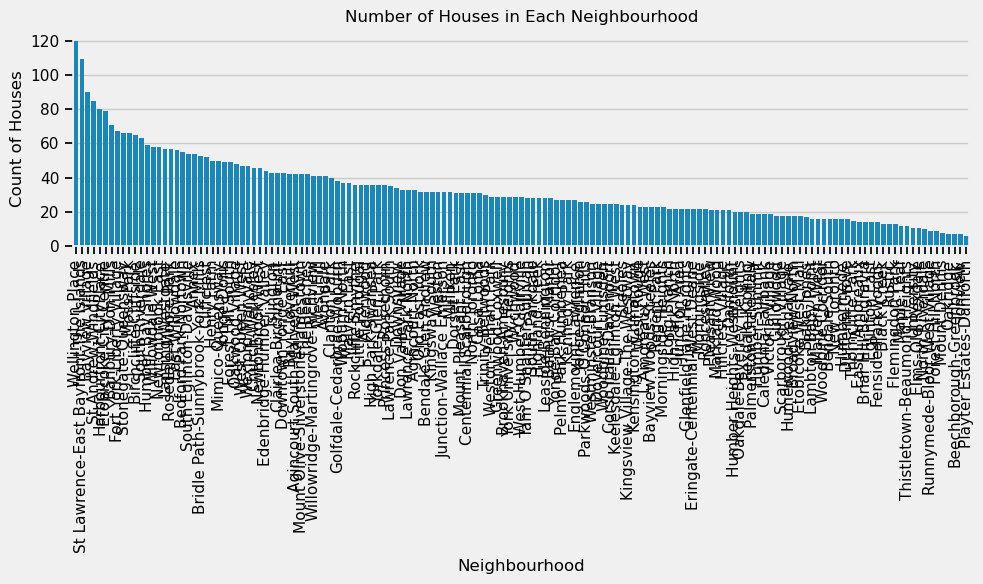

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
filtered_gdf = combined_gdf[combined_gdf['Neighbourhood'] != 'Outside City']
neighbourhood_counts = filtered_gdf['Neighbourhood'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values)

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Houses')
plt.title('Number of Houses in Each Neighbourhood')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
neighbourhoods = combined_gdf[['Neighbourhood', 'Type']].copy()
neighbourhoods = neighbourhoods.groupby(['Neighbourhood', 'Type']).size().reset_index(name='Count')

neighbourhoods

,Neighbourhood,Type,Count
0,Agincourt North,Condo Apt,8
1,Agincourt North,Condo Townhouse,3
2,Agincourt North,Detached,16
3,Agincourt South-Malvern West,Condo Apt,12
4,Agincourt South-Malvern West,Detached,18
...,...,...,...
471,York University Heights,Semi-Detached,3
472,Yorkdale-Glen Park,Condo Apt,4
473,Yorkdale-Glen Park,Condo Townhouse,4
474,Yorkdale-Glen Park,Detached,18


In [17]:
neighbourhoods.to_csv("Hood_type_count.csv")

In [18]:
link_hood_add = combined_gdf[['link','Neighbourhood', 'address']].copy()
link_hood_add = link_hood_add[link_hood_add['Neighbourhood'] != 'Outside City']

link_hood_add

,link,Neighbourhood,address
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,Humber Heights-Westmount,"508 - 40 Richview Rd , Etobicoke - Humber Heights"
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,Mount Olive-Silverstone-Jamestown,"24 Wallis Cres , Etobicoke - Mount Olive-Silve..."
7,/on/toronto-real-estate/2611-8-eglinton-ave-e/...,North Toronto,"2611 - 8 Eglinton Ave E , Toronto - Mount Plea..."
9,/on/etobicoke-real-estate/405-35-fontenay-crt/...,Edenbridge-Humber Valley,"405 - 35 Fontenay Crt , Etobicoke - Edenbridge..."
10,/on/toronto-real-estate/12-51-florence-st/home...,Little Portugal,"12 - 51 Florence St , Toronto - Little Portugal"
...,...,...,...
6769,NaN,Lambton Baby Point,47 Baby Point Crescent
6770,NaN,Bathurst Manor,180 Cocksfield Avenue
6771,NaN,Bridle Path-Sunnybrook-York Mills,45 Bayview Ridge Ridge
6772,NaN,Bridle Path-Sunnybrook-York Mills,38 Salonica Road


In [19]:
link_hood_add.to_csv("link_hood_add.csv")